# Libraries

In [126]:
from functions import *

# Select dataset

In [ ]:
df = sort_contours_using_uniform_pdf_and_group("dataset_contours_aggregate_by_patch.csv", "dataset_contours_aggregate_by_patch.json", 340, 3)

,image_name,"x coordinate in 0,0","y coordinate in 0,0",diameter (px),diameter (mm),area (px),area (mm2),group by diameter (px)
0,01_142.png,"[70.70468751625071, 69.70468751625071, 68.7046...","[-182.42916549660777, -181.42916549660777, -18...",465.726135,13.971784,96149.0,86.53410,1
1,15_208.png,"[-8.052231352587455, -9.052231352587455, -10.0...","[-215.08891659376923, -214.08891659376923, -21...",420.646027,12.619381,72590.5,65.33145,1
2,01_229.png,"[42.83156122629808, 41.83156122629808, 40.8315...","[-107.08414883073749, -106.08414883073749, -10...",342.597656,10.277930,50787.0,45.70830,1
3,12_125.png,"[39.09159659940207, 38.09159659940207, 37.0915...","[-124.30869768310913, -123.30869768310913, -12...",331.187469,9.935624,35680.0,32.11200,1
4,11_271.png,"[-102.75876537595286, -103.75876537595286, -10...","[-81.63570902633398, -80.63570902633398, -80.6...",317.042786,9.511284,30784.0,27.70560,1
...,...,...,...,...,...,...,...,...
335,15_418.png,"[-2.4357696566998897, -3.4357696566998897, -4....","[-10.898671096345538, -9.898671096345538, -9.8...",22.538633,0.676159,301.0,0.27090,3
336,03_469.png,"[-2.395024875621857, -2.395024875621857, -3.39...","[-10.3313432835821, -9.3313432835821, -8.33134...",22.383963,0.671519,167.5,0.15075,3
337,16_235.png,"[4.707172995780525, 3.7071729957805246, 2.7071...","[-9.233755274261512, -8.233755274261512, -8.23...",19.530491,0.585915,197.5,0.17775,3
338,13_156.png,"[0.2968888888888159, -0.7031111111111841, -1.7...","[-9.617777777777746, -8.617777777777746, -7.61...",19.235584,0.577068,187.5,0.16875,3


# Fill

In [ ]:
img_w, img_h = 100, 13000
i = 1
df_group = df[df['group by diameter (px)'] == i]
target_size = df_group['diameter (px)'].max()
target_size -= 80
x_df = df_group['x coordinate in 0,0'].values
y_df = df_group['y coordinate in 0,0'].values
nx = int(round(img_w / target_size))
ny = int(round(img_h / target_size))
cell_w = img_w / nx
cell_h = img_h / ny
centers = []
ids = []
quad_contours = []
for j in range(ny):
    for i in range(nx):
        cx = (i + 0.5) * cell_w
        cy = (j + 0.5) * cell_h
        centers.append((cx, cy))
        ids.append(j * nx + i)
        quad_contours.append([(cx - cell_w / 2, cy - cell_h / 2), (cx + cell_w / 2, cy - cell_h / 2), (cx + cell_w / 2, cy + cell_h / 2), (cx - cell_w / 2, cy + cell_h / 2)])
center_ids_selected = np.random.choice(ids, size=len(df_group), replace=False)
centers = np.array(centers)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.ones((img_h, img_w)), cmap="gray")
# Grid em azul
for i in range(nx + 1):
    x = i * cell_w
    ax.axvline(x, color='blue', linewidth=1)
for j in range(ny + 1):
    y = j * cell_h
    ax.axhline(y, color='blue', linewidth=1)
cont = 0
gen_contours = {}
for j in center_ids_selected:
    cx, cy = centers[j, 0], centers[j, 1]
    cx_noise = noise_point([cx], value_noise=1)
    cy_noise = noise_point([cy], value_noise=1)
    ax.scatter(cx_noise, cy_noise, c='red', s=2)
    x_new, y_new = transport_polygon(x_df[cont], y_df[cont], cx_noise[0], cy_noise[0])
    gen_contours[f"{str(cont)}"] = {"x": x_new, "y": y_new}
    ax.plot(x_new, y_new, 'white')
    ax.fill(x_new, y_new, 'white', alpha=0.3)
    cont += 1
plt.show() 

MemoryError: Unable to allocate 1.81 GiB for an array with shape (13000, 4666, 4) and data type float64

<Figure size 700x700 with 1 Axes>

tamanho do grupo 1:  100
188.56808471679688
Grid: 13x13 (192.31x192.31)
tamanho do grupo 2:  100
34.44291687011719
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

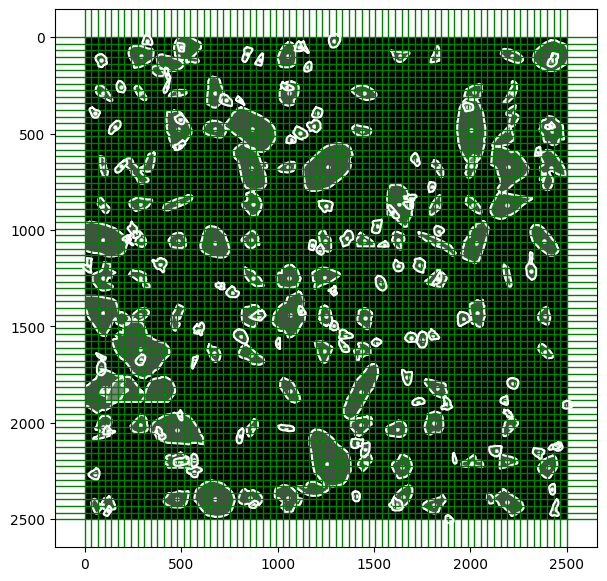

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Build a grid
i = 1
img_w, img_h = 2500, 2500


# ----------------- Cálculo do grid -----------------

print(f"Grid: {nx}x{ny} ({cell_w:.2f}x{cell_h:.2f})")

# ----------------- Geração dos centroides e IDs -----------------





# Grid em azul
for i in range(nx + 1):
    x = i * cell_w
    # ax.axvline(x, color='blue', linewidth=1)
for j in range(ny + 1):
    y = j * cell_h
    # ax.axhline(y, color='blue', linewidth=1)

# Loop para plotar um por um
cont = 0
gen_contours = {}
for j in center_ids_selected:
    cx, cy = centers[j, 0], centers[j, 1]
    cx_noise = noise_point([cx], value_noise=1)
    cy_noise = noise_point([cy], value_noise=1)
    ax.scatter(cx_noise, cy_noise, c='white', s=5)
    x_new, y_new = transport_polygon(x_df[cont], y_df[cont], cx_noise[0], cy_noise[0])
    gen_contours[f"{str(cont)}"] = {"x": x_new, "y": y_new}
    ax.plot(x_new, y_new, 'white')
    ax.fill(x_new, y_new, 'white', alpha=0.3)
    cont += 1

i = 2
df_group = df[df['group by diameter (px)'] == i]
print("tamanho do grupo 2: ", len(df_group))
target_size = df_group['diameter (px)'].max()
target_size -= 55
print(target_size)
x_df = df_group['x coordinate in 0,0'].values
y_df = df_group['y coordinate in 0,0'].values

# ----------------- Cálculo do grid -----------------
nx = int(round(img_w / target_size))   # número de colunas
ny = int(round(img_h / target_size))   # número de linhas

cell_w = img_w / nx
cell_h = img_h / ny

# ----------------- Geração dos centroides e IDs -----------------
centers = []   # [(cx, cy), ...]
ids = []       # [0, 1, 2, ...]
for j in range(ny):          # linhas (y)
    for i in range(nx):      # colunas (x)
        cx = (i + 0.5) * cell_w
        cy = (j + 0.5) * cell_h
        centers.append((cx, cy))
        ids.append(j * nx + i)

print(ids)
center_ids_selected = np.random.choice(ids, size=len(df_group), replace=False)
print("IDs dos centros selecionados eapa 2:", center_ids_selected)
centers = np.array(centers)

# Grid em verde
for i in range(nx + 1):
    x = i * cell_w
    ax.axvline(x, color='green', linewidth=1)
for j in range(ny + 1):
    y = j * cell_h
    ax.axhline(y, color='green', linewidth=1)

cont2 = 0
for j in center_ids_selected:
    cx, cy = centers[j, 0], centers[j, 1]
    cx_noise = noise_point([cx], value_noise=1)
    cy_noise = noise_point([cy], value_noise=1)
    ax.scatter(cx_noise, cy_noise, c='white', s=5)
    x_new, y_new = transport_polygon(x_df[cont2], y_df[cont2], cx_noise[0], cy_noise[0])
    #gen_contours[f"{str(+1)}"] = {"x": x_new, "y": y_new}
    ax.plot(x_new, y_new, 'white')
    ax.fill(x_new, y_new, 'white', alpha=0.3)
    cont2 += 1


    # Plota o ponto atual
    
    # # Opcional: Limitar o número de labels na legenda
    # if len(ax.get_legend_handles_labels()[0]) > 10:
    #     ax.legend_.remove()
plt.show()  # Mantém a janela aberta após o loop

# # Centroides em vermelho
# ax.scatter(centers[:, 0], centers[:, 1], c='red')

# ax.set_xlim(0, img_w)
# ax.set_ylim(img_h, 0)  # inverte eixo Y para coordenadas de imagem
# ax.set_aspect('equal')
# ax.set_title("Grid em azul + Centroides em vermelho")
# ax.axis("off")
# plt.show()


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# matriz = np.zeros((5,5), dtype=np.uint8)
# matriz[1:4, 1:4] = 255

# np.savetxt("matriz.txt", matriz, fmt='%d')  # Salva como texto

# # Carrega de volta
# matriz_carregada = np.loadtxt("matriz.txt", dtype=np.uint8)

# plt.imshow(matriz_carregada, cmap="gray")
# plt.show()

# Gross section generator

estou aqui:  51034 (2500, 2500)


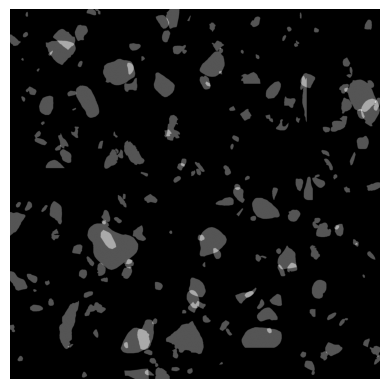

In [ ]:
generate_canvas_from_json("dataset_contours_aggregate_by_patch.json", (2500, 2500), 300)